# Training Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

### Read raw training data

In [3]:
amazon = pd.read_csv('/Users/juandherrera/Google Drive/017_Machine Learning/ml/Assignment 1/raw_data_train.csv')
print(amazon.shape)

(364000, 14)


In [4]:
# print(amazon.head())
# print(amazon['helpful'].mean())

### Feature extraction on natural language data

In [5]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = amazon.Text.as_matrix()
X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

/Users/juandherrera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [6]:
joblib.dump(vectorizer, 'vectorizer.pkl') # pickle

['vectorizer.pkl']

In [7]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X_hv = hv.fit_transform(amazon.Text)
print(X_hv.shape)

/Users/juandherrera/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/juandherrera/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(364000, 131072)


In [8]:
# type(X_hv)

In [9]:
# We want to be able to use this model fit on other data (the test set)
# So let's save a copy of this instance of HashingVectorizer to be able to transform other data with this fit
# http://scikit-learn.org/stable/modules/model_persistence.html
joblib.dump(hv, 'hv.pkl') # pickle

['hv.pkl']

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_hv)

joblib.dump(transformer, 'transformer.pkl') # pickle

['transformer.pkl']

In [11]:
# print(type(X_tfidf))

### Create additional quantitative features

In [12]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()

X_quant_features = amazon[["Score", "reviewLen"]]
# print(X_quant_features.head(10))
# print(type(X_quant_features))

### Combine all quantitative features into a single sparse matrix

In [13]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(364000, 131074)


In [14]:
# look at an example of a "row" of a sparse matrix
# print(X_matrix.shape)
# print(X_matrix.head())
# print(X_matrix[0])

### Create `X`, scaled matrix of features

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X = sc.fit_transform(X_matrix)
print(X.shape)

joblib.dump(sc, 'sc.pkl') # pickle

(364000, 131074)


['sc.pkl']

### create `y`, vector of Labels

In [16]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


# fit models

In [17]:
from my_measures import BinaryClassificationPerformance

### MODEL: ordinary least squares

In [18]:
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X, y)
# joblib.dump(ols, 'ols.pkl') # pickle

# ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
# ols_performance.compute_measures()
# print(ols_performance.performance_measures)

### MODEL: SVM, linear

In [19]:
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle

# svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
# svm_performance.compute_measures()
# print(svm_performance.performance_measures)

### MODEL: logistic regression

In [22]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log', penalty='l2', max_iter=100, early_stopping=True, validation_fraction=0.15, tol=0.001, alpha=0.01)
lgs.fit(X, y)
joblib.dump(lgs, 'lgs.pkl') # pickle

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 26634, 'Neg': 337366, 'TP': 9914, 'TN': 334587, 'FP': 2779, 'FN': 16720, 'Accuracy': 0.9464313186813187, 'Precision': 0.7810604270070117, 'Recall': 0.37223098295411877, 'desc': 'lgs'}


### MODEL: Naive Bayes

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle

# nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
# nbs_performance.compute_measures()
# print(nbs_performance.performance_measures)

### MODEL: Perceptron

In [ ]:
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle

# prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
# prc_performance.compute_measures()
# print(prc_performance.performance_measures)

### MODEL: Ridge Regression Classifier

In [23]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=0.95, normalize=False)
rdg.fit(X, y)
joblib.dump(rdg, 'rdg.pkl') # pickle

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 26634, 'Neg': 337366, 'TP': 7932, 'TN': 336721, 'FP': 645, 'FN': 18702, 'Accuracy': 0.9468489010989011, 'Precision': 0.9247988807275271, 'Recall': 0.297814823158369, 'desc': 'rdg'}


In [ ]:
# rdg.get_params()

### What is the distribution of weights, OLS vs. ridge? 

In [ ]:
# plt.hist(ols.coef_[0])
# plt.show()

# plt.hist(rdg.coef_[0])
# plt.show()

### MODEL: Decision Tree Classifier

In [51]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=200, max_features='auto', class_weight='balanced')
dtc.fit(X_matrix, y)
joblib.dump(dtc, 'dtc.pkl') # pickle

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 26634, 'Neg': 337366, 'TP': 26424, 'TN': 336005, 'FP': 1361, 'FN': 210, 'Accuracy': 0.9956840659340659, 'Precision': 0.9510167356487313, 'Recall': 0.992115341293084, 'desc': 'dtc'}


### MODEL: Random Tree Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, max_depth=100)
rf.fit(X_matrix, y)
joblib.dump(rf, 'rf.pkl') # pickle

rf_performance = BinaryClassificationPerformance(rf.predict(X_matrix), y, 'rf')
rf_performance.compute_measures()
print(rf_performance.performance_measures)

{'Pos': 26634, 'Neg': 337366, 'TP': 5842, 'TN': 337359, 'FP': 7, 'FN': 20792, 'Accuracy': 0.9428598901098901, 'Precision': 0.9988032142246538, 'Recall': 0.21934369602763384, 'desc': 'rf'}


### ROC plot to compare performance of various models and fits

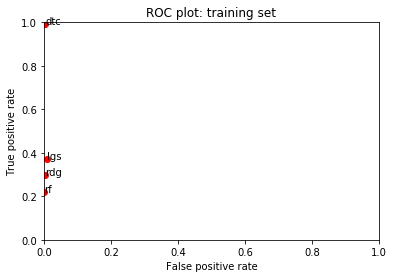

In [52]:
fits = [lgs_performance, rdg_performance, rf_performance, dtc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## a digression: looking inside the `rdg` object

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

In [ ]:
# dir(rdg)

In [ ]:
# rdg.get_params()

In [ ]:
# type(rdg.coef_)

In [ ]:
# rdg.coef_.shape

In [ ]:
# print(rdg.coef_[0])

In [ ]:
# plt.hist(rdg.coef_[0])
# plt.show()

# looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [ ]:
# amazon.loc[0, "Text"]

In [ ]:
# amazon.loc[0, "helpful"]

In [ ]:
# ridge_predictions = rdg.predict(X)

In [ ]:
# ridge_predictions.shape

In [ ]:
# print(ridge_predictions)

In [ ]:
# false positives

# import random, time

# for i in range(0, len(ridge_predictions)):
#     if (ridge_predictions[i] == True):
#         if (amazon.loc[i, "helpful"] == False):
#             if (random.uniform(0, 1) < 0.05):
#                 print(i)
#                 print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
#                 print(amazon.loc[i, "Score"])
#                 print(amazon.loc[i, "HelpfulnessDenominator"])
#                 print(amazon.loc[i, "ProductId"])
#                 print(amazon.loc[i, "Text"])
#                 print('* * * * * * * * * ')